In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [4]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [5]:
daily_df = pd.read_csv('opsd_germany_daily.csv')
daily_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [6]:
daily_df.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [7]:
daily_df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [8]:
#Setting index to 'Date' Column
daily_df = daily_df.set_index('Date')
daily_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [9]:
daily_df.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [10]:
#Alternate and more detailed data import
df = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
df.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [11]:
# Add columns for year, month, and date
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.weekday

In [12]:
# Sample your date to double check columns have been added
df.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,5
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,3
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,3
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,4
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,1


In [13]:
df.loc['2017-10-01']

Consumption     1106.68587
Wind             218.24000
Solar             87.19400
Wind+Solar       305.43400
Year            2017.00000
Month             10.00000
Weekday Name       6.00000
Name: 2017-10-01 00:00:00, dtype: float64

In [14]:
df.loc['2017-10-01':'2017-10-08']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-10-01,1106.68587,218.240,87.194,305.434,2017,10,6
2017-10-02,1327.67473,574.759,55.344,630.103,2017,10,0
2017-10-03,1176.76970,459.135,79.553,538.688,2017,10,1
2017-10-04,1458.98550,642.753,74.266,717.019,2017,10,2
2017-10-05,1480.53577,742.246,70.285,812.531,2017,10,3
2017-10-06,1463.70211,580.863,68.366,649.229,2017,10,4
2017-10-07,1248.27940,646.636,52.328,698.964,2017,10,5
2017-10-08,1150.31250,302.855,61.004,363.859,2017,10,6


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

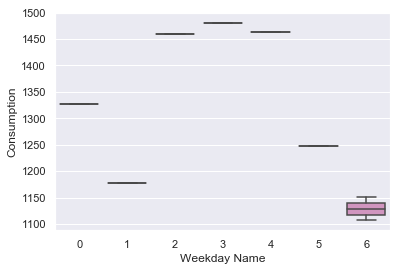

In [16]:
one_week_oct = df.loc['2017-10-01':'2017-10-08']
sns.boxplot(data=one_week_oct, x="Weekday Name", y='Consumption')

In [17]:
#Extracting data from only October 2017
df.loc['2017-10'].head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-10-01,1106.68587,218.240,87.194,305.434,2017,10,6
2017-10-02,1327.67473,574.759,55.344,630.103,2017,10,0
2017-10-03,1176.76970,459.135,79.553,538.688,2017,10,1
2017-10-04,1458.98550,642.753,74.266,717.019,2017,10,2
2017-10-05,1480.53577,742.246,70.285,812.531,2017,10,3


# Visualizing Data

In [18]:
# Function for plotting data
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

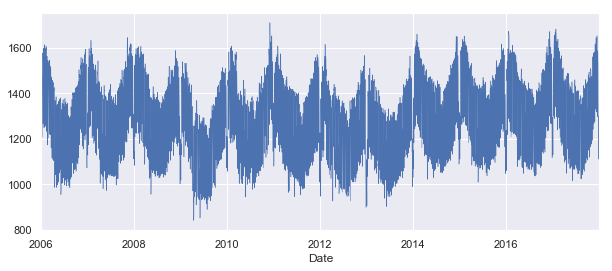

In [19]:
df['Consumption'].plot(linewidth=0.5, figsize=(10,4))

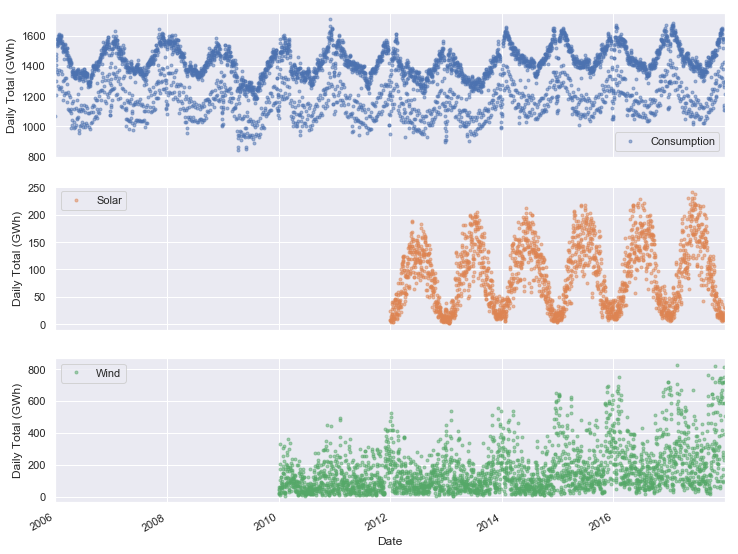

In [20]:
col_plots = ['Consumption', 'Solar', 'Wind']
axes = df[col_plots].plot(marker='.', alpha=0.5, linestyle='None', figsize=(12,10), subplots=True)
for ax in axes: 
    ax.set_ylabel('Daily Total (GWh)')

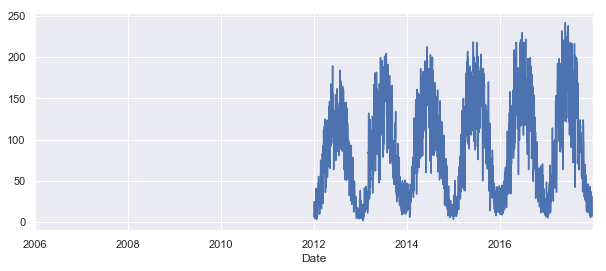

In [21]:
df['Solar'].plot(figsize=(10,4))

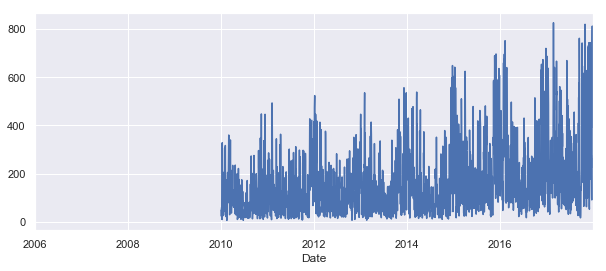

In [22]:
df['Wind'].plot(figsize=(10,4))

In [23]:
#df_date = pd.to_numeric(df["Date"],errors='coerce')
df.dtypes

Consumption     float64
Wind            float64
Solar           float64
Wind+Solar      float64
Year              int64
Month             int64
Weekday Name      int64
dtype: object

In [24]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

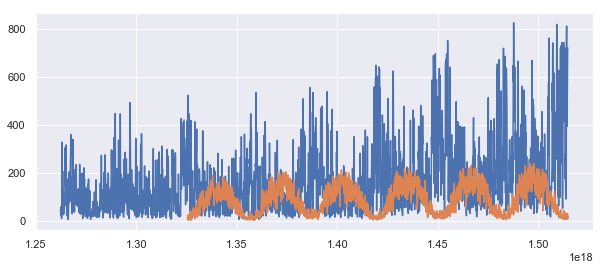

In [25]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df.index, df['Wind'])
ax.plot(df.index, df['Solar'])
#ax.annotate("Wind Has Peaked", xy=(pd.Timestamp('2016-02-06'), 1))
#arrowprops={'arrowstyle':'->', 'color':'gray'})
plt.show()

# Set up quantative bar charts

In [26]:
df_index = df.index.values.astype(float)
df_index

array([1.1360736e+18, 1.1361600e+18, 1.1362464e+18, ..., 1.5145056e+18,
       1.5145920e+18, 1.5146784e+18])

In [27]:
daily_df.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [28]:
#fig, ax = plt.subplots(figsize=(10,4))
#ax.bar(daily_df.index, daily_df['Wind'], label='Consumption')
#plt.plot()

Text(0,0.5,'Daily Consumption (GWh)')

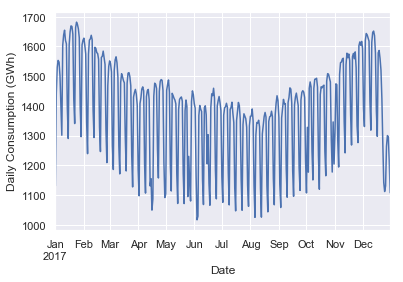

In [29]:
# Lets look into data over a single year
ax = df.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)')

Text(0,0.5,'Daily Consumption (GWh)')

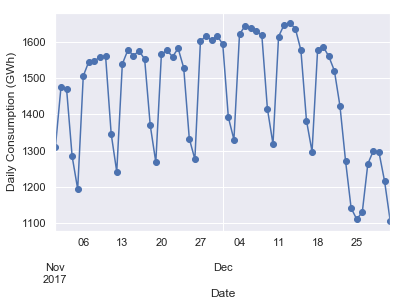

In [30]:
nov_dec = df.loc['2017-11':'2017-12', 'Consumption'].plot(marker='o', linestyle='-')
nov_dec.set_ylabel('Daily Consumption (GWh)')

# Visualizing weekly seasonlity in consumption

In [31]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(df.loc['2016-12':'2017-01', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Dec 2016 - Jan 2017 Electricity Consumption')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

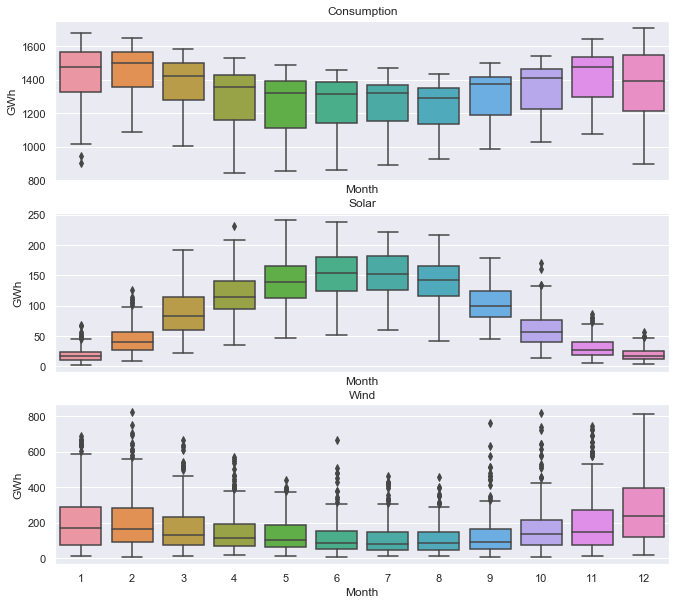

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)


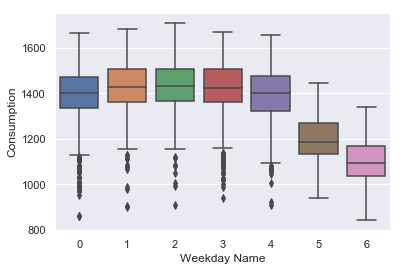

In [33]:
sns.boxplot(data=df, x='Weekday Name', y='Consumption')

# Frequencies

In [34]:
pd.date_range('2012-03-01', '2012-03-05', freq='D')

DatetimeIndex(['2012-03-01', '2012-03-02', '2012-03-03', '2012-03-04',
               '2012-03-05'],
              dtype='datetime64[ns]', freq='D')

In [35]:
# Business Daily frequency
pd.date_range('2012-03-01', '2012-03-05', freq='B')

DatetimeIndex(['2012-03-01', '2012-03-02', '2012-03-05'], dtype='datetime64[ns]', freq='B')

In [36]:
# Base Frequency
every_third_day = pd.date_range('2012-03-01', '2012-03-31', freq='3D')
every_third_day

DatetimeIndex(['2012-03-01', '2012-03-04', '2012-03-07', '2012-03-10',
               '2012-03-13', '2012-03-16', '2012-03-19', '2012-03-22',
               '2012-03-25', '2012-03-28', '2012-03-31'],
              dtype='datetime64[ns]', freq='3D')

In [37]:
# Hourly Frequency
pd.date_range('2010-10-01', periods=8, freq='H')

DatetimeIndex(['2010-10-01 00:00:00', '2010-10-01 01:00:00',
               '2010-10-01 02:00:00', '2010-10-01 03:00:00',
               '2010-10-01 04:00:00', '2010-10-01 05:00:00',
               '2010-10-01 06:00:00', '2010-10-01 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [38]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

# Resampling

In [39]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [40]:
# Specify the data columns we want to include
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

In [41]:
# Resample to weekly frequency, aggreagating with mean
df_weekly_mean = df[data_columns].resample('W').mean()
df_weekly_mean.tail(5)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571
2017-12-31,1203.265211,604.699143,19.240143,623.939286


In [42]:
print(df.shape)
print(df_weekly_mean.shape)

(4383, 7)
(627, 4)


In [43]:
# Resample to monthly frequency, aggregating with mean
df_monthly_mean = df[data_columns].resample('M').mean()
df_monthly_mean.tail(20)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2016-05-31,1300.866677,196.434968,152.154774,348.589742
2016-06-30,1332.434333,112.302300,158.894633,271.196933
2016-07-31,1304.165387,150.051032,159.443258,309.494290
2016-08-31,1293.600226,152.978806,152.254774,305.233581
2016-09-30,1334.100667,140.743833,128.280933,269.024767
2016-10-31,1367.085355,180.169290,54.174226,234.343516
2016-11-30,1478.750100,269.207733,33.985467,303.193200
2016-12-31,1440.551774,298.460968,25.547097,324.008065
2017-01-31,1530.366968,252.287968,25.755742,278.043710


# Solar Daily and Weekly Averages

In [44]:
# Start and end of the date range
start, end = '2017-01', '2017-06'

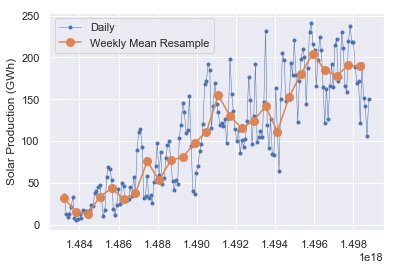

In [45]:
# Plot daily and weekly resampled time series together 
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()

# Solar Weekly and Monthly Averages

In [46]:
# Start and end of the date range
start, end = '2014-01', '2017-12'

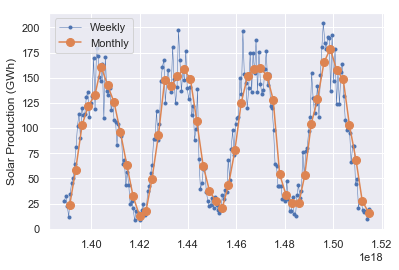

In [47]:
# Plot weekly and monthly resampled time series together
fig, ax = plt.subplots()
ax.plot(df_weekly_mean.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(df_monthly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Monthly')
ax.set_ylabel('Solar Production (GWh)')
ax.legend()

# Wind Daily and Weekly Averages

In [48]:
# Start and end of the date range
start, end = '2017-01', '2017-06'

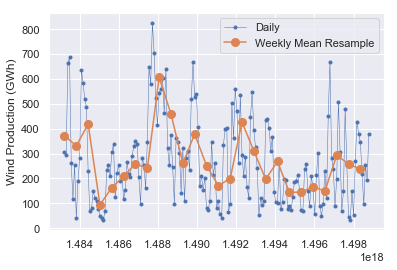

In [49]:
# Plot daily and weekly resampled time series together 
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Wind'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_weekly_mean.loc[start:end, 'Wind'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Wind Production (GWh)')
ax.legend()

# Wind Weekly and Monthly Averages

In [50]:
# Start and end of the date range
start, end = '2014-01', '2017-12'

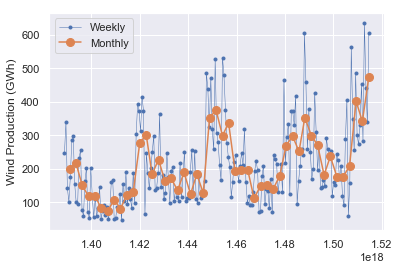

In [51]:
# Plot weekly and monthly resampled time series together
fig, ax = plt.subplots()
ax.plot(df_weekly_mean.loc[start:end, 'Wind'],
marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(df_monthly_mean.loc[start:end, 'Wind'],
marker='o', markersize=8, linestyle='-', label='Monthly')
ax.set_ylabel('Wind Production (GWh)')
ax.legend()

# Compute monthly sums, setting the value to NaN for any month which has few that 28 days of data

In [52]:
df_monthly_mean = df[data_columns].resample('M').sum(min_count=28)
df_monthly_mean.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-10-31,42355.21893,12480.097,2130.557,14610.654
2017-11-30,44339.72455,10259.001,831.044,11090.045
2017-12-31,44511.10431,14725.436,494.171,15219.607


fig, ax = plt.subplots()
ax.plot(df_monthly_mean['Consumption'], color='black', label='Consumption')
df_monthly_mean[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');